# <center>ENEM - pt. 13
<hr>

## <center>Inicialização
<hr>

In [1]:
from tcc_funcoes import *


=================================== Módulo importado com sucesso ===================================



In [2]:
dc_nome_grafico = {
    'Ciências Humanas': 'Humanas',
    'Ciências Natureza': 'Natureza',
    'Linguagem e Código': 'Linguagem',
    'Matemática': 'Matemática',
    'Redação': 'Redação'
}

In [3]:
df_cartesiano = abre_arquivo_pickle(f'df_cartesiano.pkl')
colunas = abre_arquivo_pickle(f'df_cartesiano_colunas.pkl')
dc_modelos_final = abre_arquivo_pickle('dc_modelos_final.pkl')

In [4]:
### Ajustando o dicionário de colunas do modelo XGBoost

colunas_lgbm = dc_modelos_final['lgbm']['Ciências Humanas'].feature_name_

dc_colunas_lgbm = {}

for i, col in enumerate(colunas):

    dc_colunas_lgbm[col] = colunas_lgbm[i]

del col, colunas_lgbm, i

In [5]:
dc_predicao_cartesiano = {}

for algoritmo, dc_modelos in dc_modelos_final.items():

    print(f' {algoritmo} '.center(50, '='))
    print()

    dc_predicao_cartesiano[algoritmo] = {}

    for nome, modelo in dc_modelos.items():

        print(f' {nome} '.center(50, '-'))
        print()

        df_entrada = df_cartesiano.copy()

        if algoritmo == 'lgbm':

            df_entrada = df_entrada.rename(columns=dc_colunas_lgbm)

        predicoes = modelo.predict(df_entrada)

        if nome == 'Redação':

            predicoes = arredonda_redacao(predicoes)

        dc_predicao_cartesiano[algoritmo][nome] = predicoes

    del algoritmo, dc_modelos, nome, modelo, df_entrada, predicoes
    gc.collect()

====================== xgb =======================

---------------- Ciências Humanas ----------------

--------------- Ciências Natureza ----------------

--------------- Linguagem e Código ---------------

------------------- Matemática -------------------

-------------------- Redação ---------------------

====================== lgbm ======================

---------------- Ciências Humanas ----------------

--------------- Ciências Natureza ----------------

--------------- Linguagem e Código ---------------

------------------- Matemática -------------------

-------------------- Redação ---------------------



In [6]:
dc_predicao_cartesiano['ensemble'] = {}

for nome in dc_predicao_cartesiano['xgb'].keys():

    print(f' {nome} '.center(50, '='))
    print()

    dc_predicao_cartesiano['ensemble'][nome] = (dc_predicao_cartesiano['xgb'][nome] + dc_predicao_cartesiano['lgbm'][nome]) / 2

del nome, dc_modelos_final, dc_colunas_lgbm

================ Ciências Humanas ================

=============== Ciências Natureza ================

=============== Linguagem e Código ===============

=================== Matemática ===================

==================== Redação =====================



In [7]:
df_cartesiano_completo = df_cartesiano.copy()

dc_nome_salvar = abre_arquivo_pickle('dc_nome_salvar.pkl')

for nome in dc_predicao_cartesiano['ensemble'].keys():

    nome_salvar = dc_nome_salvar[nome]

    df_cartesiano_completo[f'predicao_{nome_salvar}'] = dc_predicao_cartesiano['ensemble'][nome]

In [8]:
del nome, nome_salvar, colunas, df_cartesiano, dc_predicao_cartesiano
gc.collect()

0

In [9]:
variaveis = [
    'fx_etaria_num',
    'sexo_num',
    'cor_raca_num',
    '01_escolaridade_pai_num',
    '02_escolaridade_mae_num',
    '03_ocupacao_pai_num',
    '04_ocupacao_mae_num',
    '06_renda_familiar_num'
]

dc_fx_etaria_num = {
    1: '<_17',
    2: '17',
    3: '18',
    4: '19',
    5: '20',
    6: '21',
    7: '22',
    8: '23',
    9: '24',
    10: '25',
    11: '26_30',
    12: '31_35',
    13: '36_40',
    14: '41_45',
    15: '46_50',
    16: '51_55',
    17: '56_60',
    18: '61_65',
    19: '66_70',
    20: '>_70'
}

dc_sexo_num = {
    1: 'F',
    2: 'M'
}

dc_cor_raca_num = {
    1: 'branca',
    2: 'preta',
    3: 'parda',
    4: 'amarela',
    5: 'indigena'
}

dc_01_escolaridade_pai_num = {
    1: 'sem_estudo',
    2: 'nao_completou_4_ano_fundamental',
    3: 'nao_completou_8_ano_fundamental',
    4: 'nao_completou_ensino_medio',
    5: 'completou_ensino_medio',
    6: 'completou_superior',
    7: 'completou_pos_graduacao'
}

dc_02_escolaridade_mae_num = dc_01_escolaridade_pai_num

dc_03_ocupacao_pai_num = {
    1: 'trabalhador_rural',
    2: 'servicos_geral_atendimento',
    3: 'operario_trabalhador_manual',
    4: 'tecnicos_pequenos_proprietarios',
    5: 'alta_qualificacao_gestao'
}

dc_04_ocupacao_mae_num = dc_03_ocupacao_pai_num

dc_06_renda_familiar_num = {
    1: 'sem_renda',
    2: 'ate_1.0',
    3: 'ate_1.5',
    4: 'ate_2.0',
    5: 'ate_2.5',
    6: 'ate_3.0',
    7: 'ate_4.0',
    8: 'ate_5.0',
    9: 'ate_6.0',
    10: 'ate_7.0',
    11: 'ate_8.0',
    12: 'ate_9.0',
    13: 'ate_10.0',
    14: 'ate_12.0',
    15: 'ate_15.0',
    16: 'ate_20.0',
    17: 'mais_20.0'
}

In [10]:
df_cartesiano_completo.columns

Index(['fx_etaria_num', 'sexo_num', 'cor_raca_num',
       'conclusao_ensino_medio_num', 'lingua_estrangeira_num',
       '01_escolaridade_pai_num', '02_escolaridade_mae_num',
       '03_ocupacao_pai_num', '04_ocupacao_mae_num', '05_qtde_moradores_num',
       '06_renda_familiar_num', '07_dias_trabalhador_domestico_num',
       '08_qtde_banheiro_num', '09_qtde_quarto_num', '10_qtde_carro_num',
       '11_qtde_motocicleta_num', '12_qtde_geladeira_num',
       '13_qtde_freezer_num', '14_qtde_maq_lavar_roupa_num',
       '15_qtde_maq_secar_roupa_num', '16_qtde_micro_ondas_num',
       '18_flag_aspirador_po_num', '19_qtde_tv_num',
       '20_flag_aparelho_dvd_num', '21_flag_tv_assinatura_num',
       '22_qtde_celular_num', '23_flag_telefone_fixo_num',
       '24_qtde_computadores_num', '25_flag_internet_num', 'predicao_humanas',
       'predicao_natureza', 'predicao_linguagem_codigo', 'predicao_matematica',
       'predicao_redacao'],
      dtype='object')

In [11]:
df_cartesiano_completo.shape[0]

4165000

fx_etaria_num - Ciências Humanas: maior diferença nota: 45.26
fx_etaria_num - Ciências Natureza: maior diferença nota: 46.00
fx_etaria_num - Linguagem e Código: maior diferença nota: 68.99
fx_etaria_num - Matemática: maior diferença nota: 93.05
fx_etaria_num - Redação: maior diferença nota: 199.07
fig_sensibilidade_fx_etaria.png


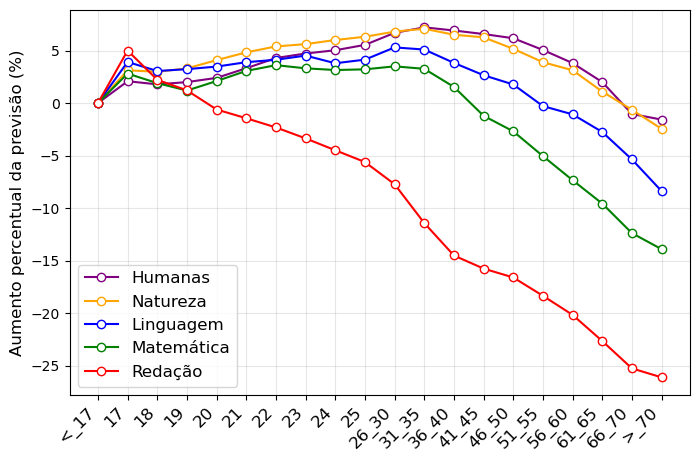

sexo_num - Ciências Humanas: maior diferença nota: 14.72
sexo_num - Ciências Natureza: maior diferença nota: 16.96
sexo_num - Linguagem e Código: maior diferença nota: 3.51
sexo_num - Matemática: maior diferença nota: 49.07
sexo_num - Redação: maior diferença nota: 19.42
fig_sensibilidade_sexo.png


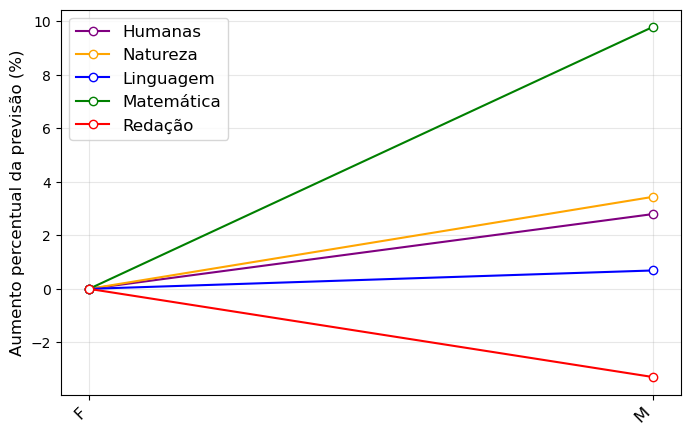

cor_raca_num - Ciências Humanas: maior diferença nota: 28.45
cor_raca_num - Ciências Natureza: maior diferença nota: 16.35
cor_raca_num - Linguagem e Código: maior diferença nota: 19.92
cor_raca_num - Matemática: maior diferença nota: 24.77
cor_raca_num - Redação: maior diferença nota: 36.04
fig_sensibilidade_cor_raca.png


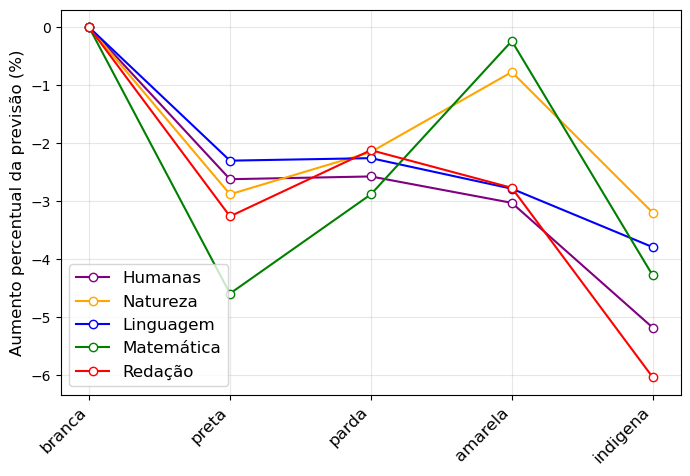

01_escolaridade_pai_num - Ciências Humanas: maior diferença nota: 22.30
01_escolaridade_pai_num - Ciências Natureza: maior diferença nota: 21.96
01_escolaridade_pai_num - Linguagem e Código: maior diferença nota: 19.31
01_escolaridade_pai_num - Matemática: maior diferença nota: 28.10
01_escolaridade_pai_num - Redação: maior diferença nota: 26.80
fig_sensibilidade_01_escolaridade_pai.png


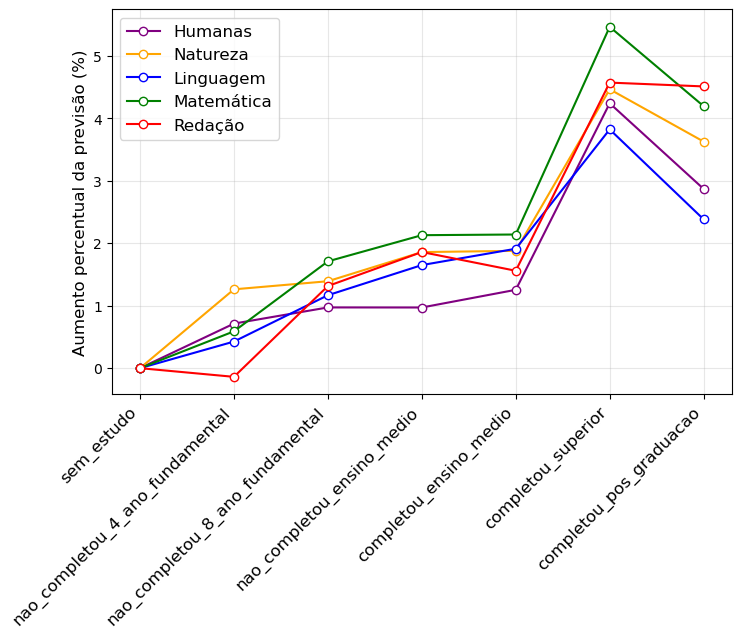

02_escolaridade_mae_num - Ciências Humanas: maior diferença nota: 20.62
02_escolaridade_mae_num - Ciências Natureza: maior diferença nota: 23.49
02_escolaridade_mae_num - Linguagem e Código: maior diferença nota: 23.74
02_escolaridade_mae_num - Matemática: maior diferença nota: 35.92
02_escolaridade_mae_num - Redação: maior diferença nota: 48.26
fig_sensibilidade_02_escolaridade_mae.png


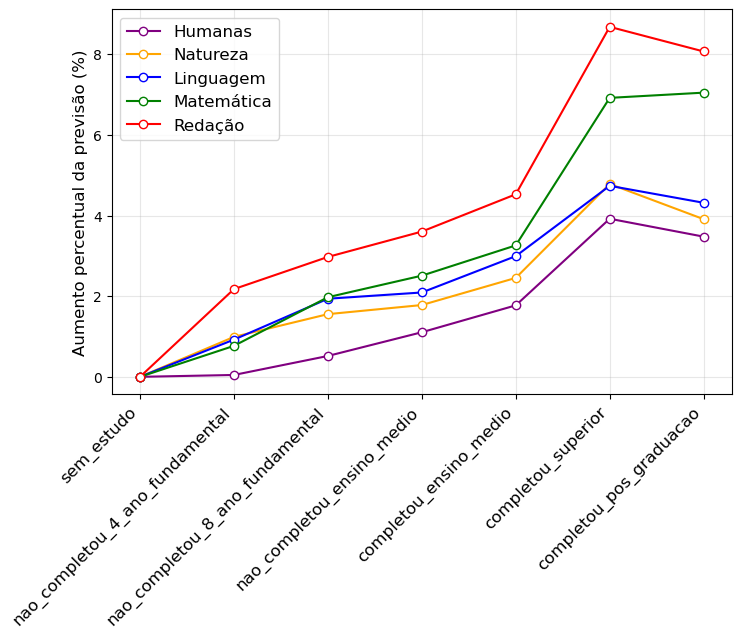

03_ocupacao_pai_num - Ciências Humanas: maior diferença nota: 12.35
03_ocupacao_pai_num - Ciências Natureza: maior diferença nota: 4.77
03_ocupacao_pai_num - Linguagem e Código: maior diferença nota: 13.90
03_ocupacao_pai_num - Matemática: maior diferença nota: 14.48
03_ocupacao_pai_num - Redação: maior diferença nota: 14.19
fig_sensibilidade_03_ocupacao_pai.png


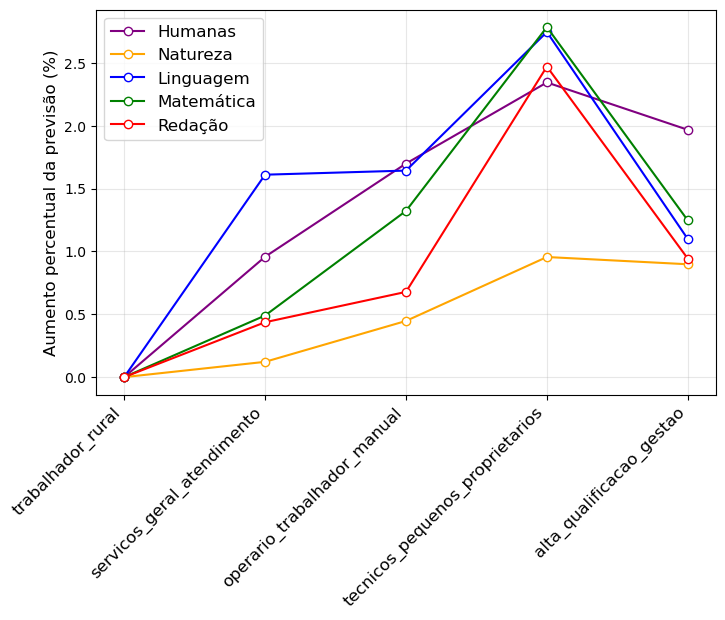

04_ocupacao_mae_num - Ciências Humanas: maior diferença nota: 12.63
04_ocupacao_mae_num - Ciências Natureza: maior diferença nota: 8.35
04_ocupacao_mae_num - Linguagem e Código: maior diferença nota: 15.98
04_ocupacao_mae_num - Matemática: maior diferença nota: 14.96
04_ocupacao_mae_num - Redação: maior diferença nota: 27.89
fig_sensibilidade_04_ocupacao_mae.png


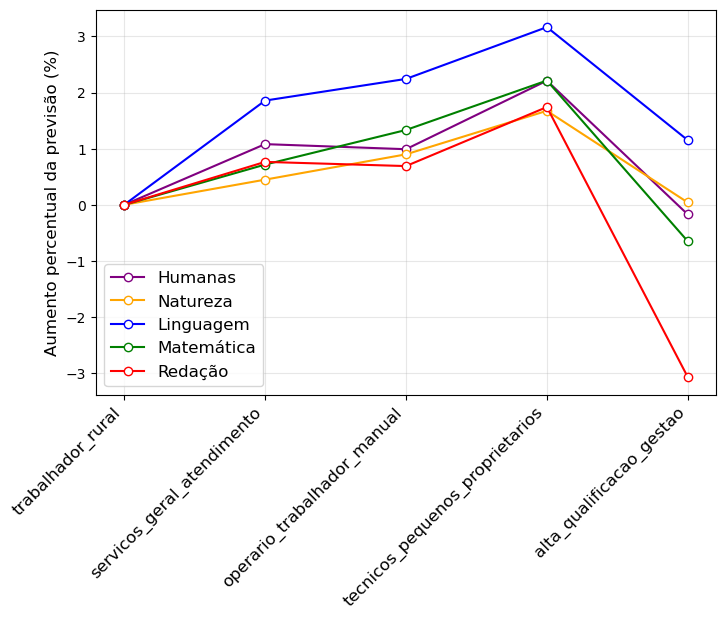

06_renda_familiar_num - Ciências Humanas: maior diferença nota: 76.94
06_renda_familiar_num - Ciências Natureza: maior diferença nota: 66.29
06_renda_familiar_num - Linguagem e Código: maior diferença nota: 49.82
06_renda_familiar_num - Matemática: maior diferença nota: 89.49
06_renda_familiar_num - Redação: maior diferença nota: 99.21
fig_sensibilidade_06_renda_familiar.png


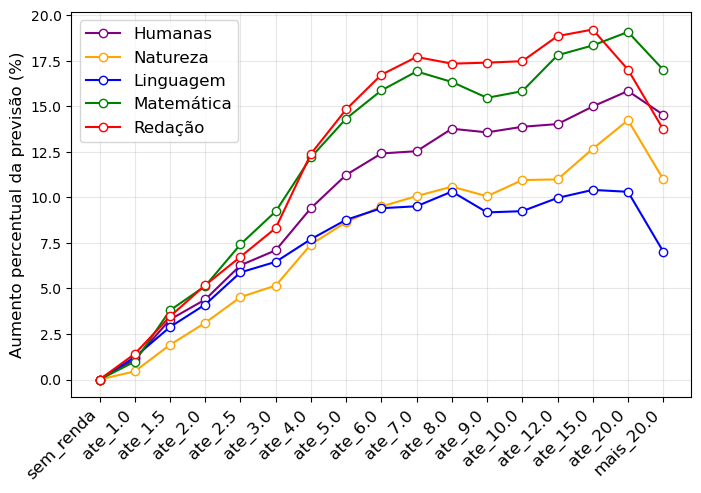

In [18]:
dc_cor = {
    'Redação': 'red',
    'Linguagem e Código': 'blue',
    'Matemática': 'green',
    'Ciências Natureza': 'orange',
    'Ciências Humanas': 'purple'
    }

dc_label = {
    'fx_etaria_num': 'Faixa Etária',
    'sexo_num': 'Sexo biológico',
    'cor_raca_num': 'Cor/Raça',
    '01_escolaridade_pai_num': 'Escolaridade do pai',
    '02_escolaridade_mae_num': 'Escolaridade da mãe',
    '03_ocupacao_pai_num': 'Ocupação do pai',
    '04_ocupacao_mae_num': 'Ocupação da mãe',
    '06_renda_familiar_num': 'Renda familiar'
}

for col in variaveis:

    plt.figure(figsize=(8, 5))

    plt.xticks(rotation=45, fontsize=12, ha='right')

    for nome, nome_salvar in dc_nome_salvar.items():

        df = df_cartesiano_completo.groupby(col).agg({f'predicao_{nome_salvar}': 'mean'}).reset_index()

        df[f'predicao_{nome_salvar}_percentual'] = (df[f'predicao_{nome_salvar}'] / df[f'predicao_{nome_salvar}'].iloc[0] - 1) * 100
        # df[f'predicao_{nome_salvar}_percentual'] = (df[f'predicao_{nome_salvar}'] / df[f'predicao_{nome_salvar}'].min() - 1) * 100

        # plt.xlabel(dc_label[col], fontsize=12)
        plt.ylabel('Aumento percentual da previsão (%)', fontsize=12)

        plt.plot(
            df[col].map(eval(f'dc_{col}')),
            df[f'predicao_{nome_salvar}_percentual'],
            marker='o',
            linestyle='-',
            color=dc_cor[nome],
            markerfacecolor='white',
            alpha=1,
            label=dc_nome_grafico[nome],
            linewidth=1.5
        )

        print(f'{col} - {nome}: maior diferença nota: {df[f"predicao_{nome_salvar}"].max() - df[f"predicao_{nome_salvar}"].min():.2f}')

    if col in ['fx_etaria_num', '04_ocupacao_mae_num', 'cor_raca_num']:
        plt.legend(fontsize=12, loc='lower left')

    if col in ['06_renda_familiar_num', 'sexo_num', '01_escolaridade_pai_num', '02_escolaridade_mae_num', '03_ocupacao_pai_num']:
        plt.legend(fontsize=12, loc='upper left')

    plt.grid(alpha=0.3)

    print(f"fig_sensibilidade_{col.replace('_num', '')}.png")

    plt.savefig(f"../texto/imagens/fig_sensibilidade_{col.replace('_num', '')}.png", dpi=300, bbox_inches='tight')

    plt.show()

## <center>Escolaridade dos pais
<hr>

In [21]:
df_escolaridade_mae = df_cartesiano_completo.groupby('02_escolaridade_mae_num').agg({f'predicao_{nome_salvar}': 'mean'}).reset_index()
df_escolaridade_pai = df_cartesiano_completo.groupby('01_escolaridade_pai_num').agg({f'predicao_{nome_salvar}': 'mean'}).reset_index()

from scipy import stats

slope_mae, intercept_mae, r_value_mae, p_value_mae, std_err_mae = stats.linregress(df_escolaridade_mae['02_escolaridade_mae_num'], df_escolaridade_mae[f'predicao_{nome_salvar}'])
slope_pai, intercept_pai, r_value_pai, p_value_pai, std_err_pai = stats.linregress(df_escolaridade_pai['01_escolaridade_pai_num'], df_escolaridade_pai[f'predicao_{nome_salvar}'])

print(f'Mãe: slope: {slope_mae:.4f}, r_value: {r_value_mae:.4f}')
print(f'Pai: slope: {slope_pai:.4f}, r_value: {r_value_pai:.4f}')

Mãe: slope: 7.6980, r_value: 0.9564
Pai: slope: 4.7128, r_value: 0.9313


In [38]:
df_escolaridade_mae['reg_lin'] = intercept_mae + slope_mae * df_escolaridade_mae['02_escolaridade_mae_num']
df_escolaridade_pai['reg_lin'] = intercept_pai + slope_pai * df_escolaridade_pai['01_escolaridade_pai_num']

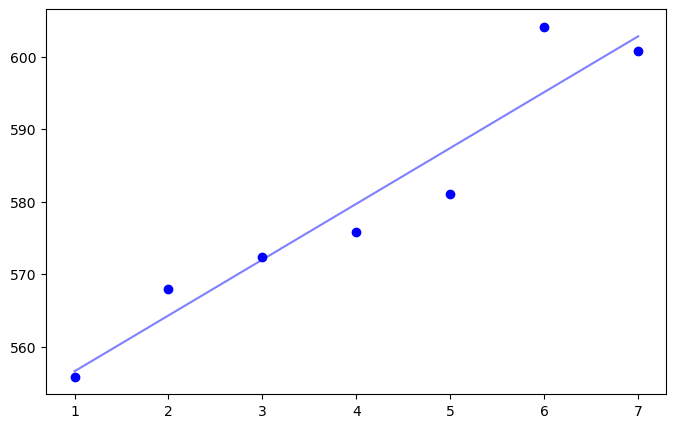

In [34]:
plt.figure(figsize=(8, 5))

plt.scatter(
    df_escolaridade_mae['02_escolaridade_mae_num'],
    df_escolaridade_mae[f'predicao_{nome_salvar}'],
    color='blue',
    label='Escolaridade da mãe'
)

plt.plot(
    df_escolaridade_mae['02_escolaridade_mae_num'],
    df_escolaridade_mae['reg_lin'],
    color='blue',
    alpha=0.5,
    label='Linha de tendência mãe',
    linestyle='-'
)

R² Mãe: 0.9147
R² Pai: 0.8673


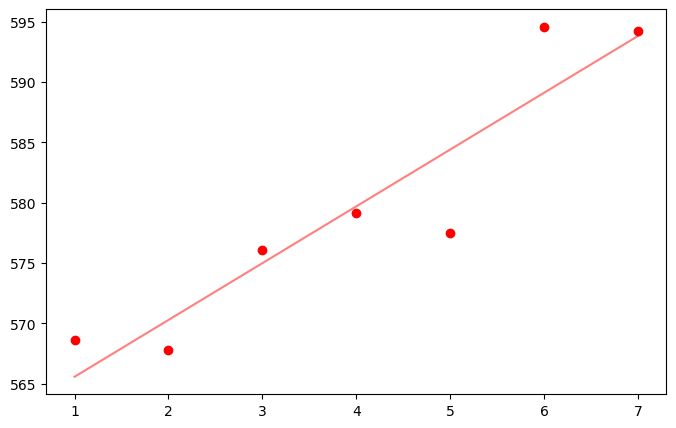

In [40]:
plt.figure(figsize=(8, 5))

plt.scatter(
    df_escolaridade_pai['01_escolaridade_pai_num'],
    df_escolaridade_pai[f'predicao_{nome_salvar}'],
    color='red',
    label='Escolaridade do pai'
)

plt.plot(
    df_escolaridade_pai['01_escolaridade_pai_num'],
    df_escolaridade_pai['reg_lin'],
    color='red',
    alpha=0.5,
    label='Linha de tendência pai',
    linestyle='-'
)

from sklearn.metrics import r2_score
print(f'R² Mãe: {r2_score(df_escolaridade_mae[f"predicao_{nome_salvar}"], df_escolaridade_mae["reg_lin"]):.4f}')
print(f'R² Pai: {r2_score(df_escolaridade_pai[f"predicao_{nome_salvar}"], df_escolaridade_pai["reg_lin"]):.4f}')

## <center>Renda Familiar
<hr>

In [44]:
df_renda = df_cartesiano_completo.groupby('06_renda_familiar_num').agg({f'predicao_{nome_salvar}': 'mean'}).reset_index()

slope_renda, intercept_renda, r_value_renda, p_value_renda, std_err_renda = stats.linregress(df_renda['06_renda_familiar_num'], df_renda[f'predicao_{nome_salvar}'])

In [45]:
df_renda['reg_lin'] = intercept_renda + slope_renda * df_renda['06_renda_familiar_num']

In [49]:
slope_log, intercept_log = np.polyfit(np.log(df_renda['06_renda_familiar_num']), df_renda[f'predicao_{nome_salvar}'], 1)

df_renda['reg_log'] = intercept_log + slope_log * np.log(df_renda['06_renda_familiar_num'])

r2_log = r2_score(df_renda[f'predicao_{nome_salvar}'], df_renda['reg_log'])
print(f'R² Renda (Log): {r2_log:.4f}')

R² Renda (Log): 0.8690


In [59]:
df = df_renda.query("`06_renda_familiar_num` < 11").copy()

slope_renda_2, intercept_renda_2, _, _, _ = stats.linregress(df['06_renda_familiar_num'], df[f'predicao_{nome_salvar}'])

df['reg_lin_2'] = intercept_renda_2 + slope_renda_2 * df['06_renda_familiar_num']

R² Renda: 0.7637
R² Renda (Renda < 11): 0.9856
10.848695114409395


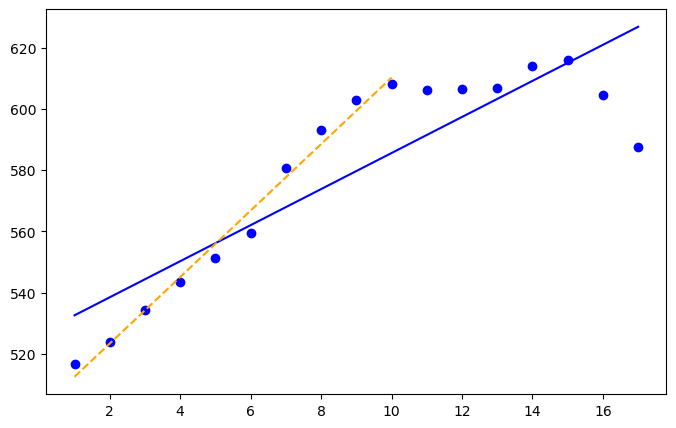

In [62]:
plt.figure(figsize=(8, 5))

plt.scatter(
    df_renda['06_renda_familiar_num'],
    df_renda[f'predicao_{nome_salvar}'],
    color='blue',
    label='Renda familiar'
)

plt.plot(
    df_renda['06_renda_familiar_num'],
    df_renda['reg_lin'],
    color='blue',
    label='Linha de regressão'
)

plt.plot(
    df['06_renda_familiar_num'],
    df['reg_lin_2'],
    color='orange',
    label='Linha de regressão (Renda < 11)',
    linestyle='--'
)

print(f'R² Renda: {r2_score(df_renda[f"predicao_{nome_salvar}"], df_renda["reg_lin"]):.4f}')
print(f'R² Renda (Renda < 11): {r2_score(df[f"predicao_{nome_salvar}"], df["reg_lin_2"]):.4f}')
print(slope_renda_2)